Populating the interactive namespace from numpy and matplotlib
(40,)


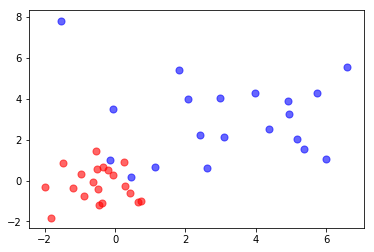

In [6]:
import numpy as np
from numpy import linalg as ln
import pylab as pl
%pylab inline

n = 20
a = np.random.normal(loc=0, scale=1, size=(n, 2))
b = np.random.normal(loc=3, scale=2, size=(n, 2))
pl.scatter(a[:, 0], a[:, 1], c='red', s=50, alpha=0.6)
pl.scatter(b[:, 0], b[:, 1], c='blue', s=50, alpha=0.6)

pl.show
y = np.hstack([np.ones(n), (-1)*np.ones(n)])
x = np.vstack([a, b])
print(y.shape)

In [59]:
class FRiS_class:
    size = 0
    x_array = 0
    y_array = 0
    weights = 0
    stolps = 0
    def new(x, y):
        FRiS_class.size = y.shape[0]
        FRiS_class.x_array = x
        FRiS_class.y_array = y
        FRiS_class.weights = np.array([1/FRiS_class.size for i in range(FRiS_class.size)])
        FRiS_class.stolps = [1 for i in range(FRiS_class.size)]
        
    def prediction(self, z):
        if (ln.norm(z - self.stolp[0]) > ln.norm(z - self.stolp[1])):
            return -1
        else:
            return 1
    def positive(self):
        ans = 0
        for i in range(self.size):
            if (self.y_array[i] == self.prediction(self.x_array[i])):
                ans += self.weights[i]
        return ans
            
    def __init__(self):
        max = 0;
        s = [0, 0]
        count = int(self.size/2)
        for i in range(count):
            for j in range(count, self.size):
                F_a = 0
                F_b = 0
                for h in range(count):
                    if (i!=h):
                        r_2 = ln.norm(self.x_array[j] - self.x_array[h])
                        r_1 = ln.norm(self.x_array[i] - self.x_array[h])
                        F_a+=(self.weights[h])*(r_2 - r_1)/(r_2+r_1)
                    if (j!=h):
                        r_2 = ln.norm(self.x_array[i] - self.x_array[h+count])
                        r_1 = ln.norm(self.x_array[j] - self.x_array[h+count])
                        F_b += (self.weights[h + count])*(r_2 - r_1)/(r_2+r_1)
                F = (F_a  + F_b)/self.size
                if (F > max):
                    max = F
                    s[0] = i
                    s[1] = j
        self.stolp = [self.x_array[s[0]], self.x_array[s[1]]]
        self.alpha_weight = log(self.positive()/(1-self.positive()))/2
        print(self.alpha_weight)
        normalize = 0
        for i in range(self.size):
            self.weights[i] = self.weights[i]*exp((-1)*self.alpha_weight*self.y_array[i]*self.prediction(self.x_array[i]))
            normalize += self.weights[i]          
        for i in range(self.size): 
            self.weights[i]/=normalize
        print(s[0]+1, s[1]+1)
        print("\n")
    
    def show_pred(self, array):
        for i in range(array.shape[0]):
            if (self.prediction(array[i]) == 1):
                pl.scatter(array[i][0], array[i][1], c = "red", s = 50, alpha = 0.6)
            else:
                pl.scatter(array[i][0], array[i][1], c = "blue", s = 50, alpha = 0.6)
        pl.scatter(self.stolp[0][0], self.stolp[0][1], c = "green", s = 50, alpha = 0.6)
        pl.scatter(self.stolp[1][0], self.stolp[1][1], c = "yellow", s = 50, alpha = 0.6)
        pl.show
                      

In [60]:
FRiS_class.new(x, y)
boost = []
boost.append(FRiS_class())


0.9729550745276587
19 23




In [63]:
def predict(boost, x, y):
    alpha_col = [i.alpha_weight for i in boost]
    alpha_col = [i.alpha_weight/sum(alpha_col) for i in boost]

    for j in range(len(x)):
        pred = 0
        for i in range(len(boost)):
            pred += boost[i].alpha_weight*boost[i].prediction(x[j])
        if (pred > 0):
            pl.scatter(x[j][0], x[j][1], c = "red", s = 50, alpha = FRiS_class.weights[j]**(1/4))
        else: 
            pl.scatter(x[j][0], x[j][1], c = "blue", s = 50, alpha = FRiS_class.weights[j]**(1/4))
    pl.show()
    for i in range(len(x)):
        if (y[i] == 1):
            pl.scatter(x[i][0], x[i][1], c = "red", s = 50, alpha = 1)
        else:
            pl.scatter(x[i][0], x[i][1], c = "blue", s = 50, alpha = 1)
    for i in range(len(boost)):
        print(alpha_col[i])
        pl.scatter(boost[i].stolp[0][0], boost[i].stolp[0][1], c ="green", s = 50, alpha = alpha_col[i]**(1/4))
        pl.scatter(boost[i].stolp[1][0], boost[i].stolp[1][1], c = "yellow", s = 50, alpha = alpha_col[i]**(1/4))
    pl.show()

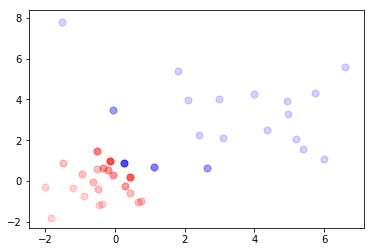

0.19972282660315882
0.1422854125311487
0.11275852163075484
0.1839012278963294
0.1165958743413547
0.13907864921087953
0.10565748778637434
-2.734805169651128e-16


D:\anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
D:\anaconda\lib\site-packages\matplotlib\colors.py:251: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
D:\anaconda\lib\site-packages\matplotlib\colors.py:251: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):
D:\anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


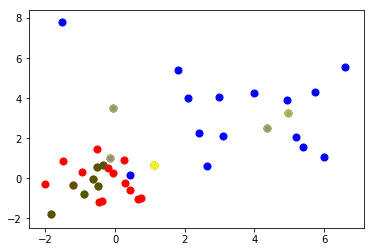

0.0
17 40




In [76]:
predict(boost, x, y)
boost.append(FRiS_class())

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


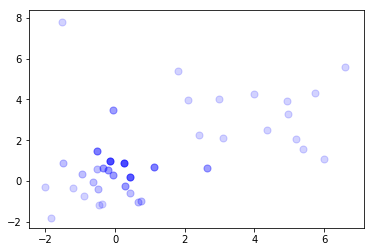

nan


D:\anaconda\lib\site-packages\matplotlib\colors.py:251: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
D:\anaconda\lib\site-packages\matplotlib\colors.py:251: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


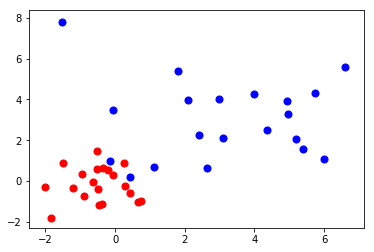

In [77]:
predict([boost[len(boost)-1]], x, y)